In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
netflix_table = pd.read_csv(r'C:\Users\Paresh H Waikar\Desktop\DATA SCIENCE\netflix_titles.csv')
print(netflix_table)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [5]:
netflix_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print(netflix_table.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [7]:
netflix_table.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix_table.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [9]:
# how many data points that are there

N = len(netflix_table)
print(N)

8807


In [12]:
types = netflix_table.groupby(['type']).count()
print(types)

         show_id  title  director  cast  country  date_added  release_year  \
type                                                                         
Movie       6131   6131      5943  5656     5691        6131          6131   
TV Show     2676   2676       230  2326     2285        2666          2676   

         rating  duration  listed_in  description  
type                                               
Movie      6129      6128       6131         6131  
TV Show    2674      2676       2676         2676  


In [13]:
print(types.index)

Index(['Movie', 'TV Show'], dtype='object', name='type')


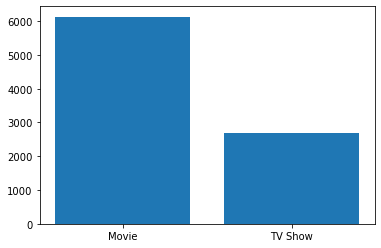

In [15]:
plt.bar(types.index,types['show_id'])
plt.show()

In [16]:
percentage_of_movies = 6131/8807
percentage_of_tv_shows = 2676/8807
print(percentage_of_movies,percentage_of_tv_shows)

0.6961507891449983 0.3038492108550017


In [19]:
directors = netflix_table.groupby(['director']).count().sort_values(['show_id'],ascending=False)
print(directors)

                                       show_id  type  title  cast  country  \
director                                                                     
Rajiv Chilaka                               19    19     19    17        3   
Raúl Campos, Jan Suter                      18    18     18    18       18   
Suhas Kadav                                 16    16     16    13        1   
Marcus Raboy                                16    16     16    16       15   
Jay Karas                                   14    14     14    14       14   
...                                        ...   ...    ...   ...      ...   
Jos Humphrey                                 1     1      1     1        1   
Jose Gomez                                   1     1      1     1        1   
Jose Javier Reyes                            1     1      1     1        0   
Joseduardo Giordano, Sergio Goyri Jr.        1     1      1     1        1   
Khaled Youssef                               1     1      1     

In [23]:
Year_on_ott = netflix_table.loc[netflix_table['release_year']>=2015]['date_added']
print(Year_on_ott)

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8796      January 17, 2017
8797    September 13, 2018
8801         March 9, 2016
8803          July 1, 2019
8806         March 2, 2019
Name: date_added, Length: 6216, dtype: object


In [22]:
Year_of_release = netflix_table.loc[netflix_table['release_year']>=2015]['release_year']
print(Year_of_release)

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8796    2016
8797    2016
8801    2015
8803    2018
8806    2015
Name: release_year, Length: 6216, dtype: int64


In [32]:
netflix_table.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [33]:
netflix_table.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [35]:
netflix_table['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [37]:
netflix_table['rating'].nunique()

17

In [38]:
netflix_table['rating'].mode()

0    TV-MA
dtype: object

In [39]:
netflix_table['country'].nunique()

748

In [40]:
netflix_table['country'].mode()

0    United States
dtype: object

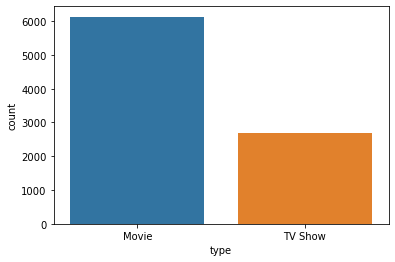

In [45]:
sns.countplot(netflix_table['type'])
plt.show()

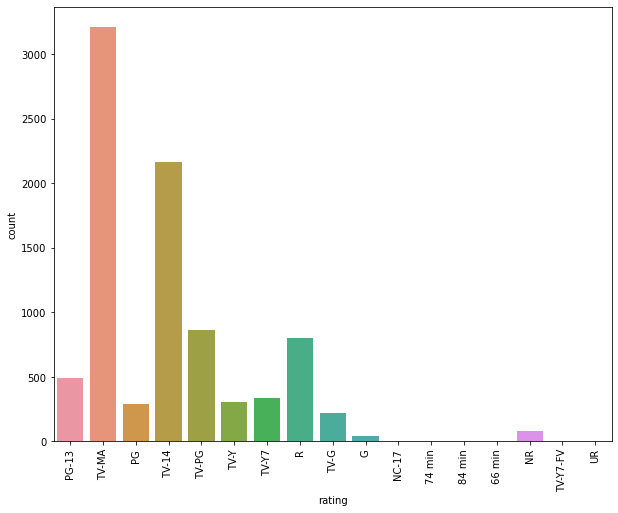

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(netflix_table['rating'])
plt.xticks(rotation='90')
plt.show()